**SUMMARY**

In the 2021 census, 30.6% of all occupied private dwellings in Australia were rented. [1]

This project aims to:
- Identify predicted high growth suburbs in Victoria
- Allow investors to maximise their rental yield
- Find areas real estate companies can focus on for increased business

We have looked at 8 features in total:
- Demographic features
  - Population
  - Income
- Proximity to features (both straight line and driving in km)
  - CBD (Central Business District)
  - nearest train station
  - shopping centers or malls
  - schools (primary, secondary and type of school)
  - hospitals or healthcare facilities
  - parks or recreational areas


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from IPython.display import Image
plot_dir = "../plots/"

**Top 10 subrubs with most growth over next 3 years**

To find the top 10 suburbs with the most growth over the next 3 years, we used the SARIMA time series model on 20 years of historical data to make forecasts.

There was some limitations as this was a time series model. Our rental data was in quaterly format, and unfortunately we could not find historical feature data in the same format, so the limitation is that our forecast only considers rental price trends as a predictor.
This could be further improved if we were able to source data for features in a time series format, so we can factor those into the model predictions.

In [3]:
#reading forecast results
forecast_df = pd.read_csv("../data/curated/forecast_results.csv")
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])

first_rent = forecast_df.groupby(['Suburb', 'Property_Type'])['Forecasted_Rent'].first()
last_rent = forecast_df.groupby(['Suburb', 'Property_Type'])['Forecasted_Rent'].last()

growth_rate = ((last_rent - first_rent) / first_rent) * 100

rent_growth_df = pd.DataFrame({
    'Initial Rent': first_rent,
    'Final Rent': last_rent,
    'Growth Rate (%)': growth_rate
})

#finding the average grwoth per suburb
mean_rent_growth_df = rent_growth_df.groupby('Suburb').mean()

top_10_suburbs = mean_rent_growth_df.sort_values(by='Growth Rate (%)', ascending=False).head(10)

print("Top 10 Suburbs with Highest Predicted Growth Rate (grouped by suburb):")
print(top_10_suburbs)

Top 10 Suburbs with Highest Predicted Growth Rate (grouped by suburb):
                                 Initial Rent   Final Rent  Growth Rate (%)
Suburb                                                                     
Springvale                         516.365523  1024.194162        94.606272
Noble Park                         476.972191   906.270973        90.228610
Mill Park-Epping                   466.982991   888.232567        87.964191
Caulfield                          712.368548  1206.626134        83.426716
Pakenham                           452.798392   833.168852        79.513997
Dandenong North-Endeavour Hills    455.011127   829.595939        76.349294
Narre Warren-Hampton Park          478.318516   842.094145        73.340830
Berwick                            482.191056   808.377255        67.316138
Altona                             472.556086   803.321587        64.637620
Dandenong                          478.728358   777.408681        61.971752


**Most important External and Internal Features**

To find the most important external and internal features that contribute to the rental price, we combined current rental data with many other features such as schools, hospitals, shops etc. We trained an XGboost model on the combined dataset to find features that most heavily affected the rental price.

Some limitations included select features not being available for every suburb, such as average weekly income per suburb, or domain having no current rental listings for more rurual suburbs, so they had to be excluded.

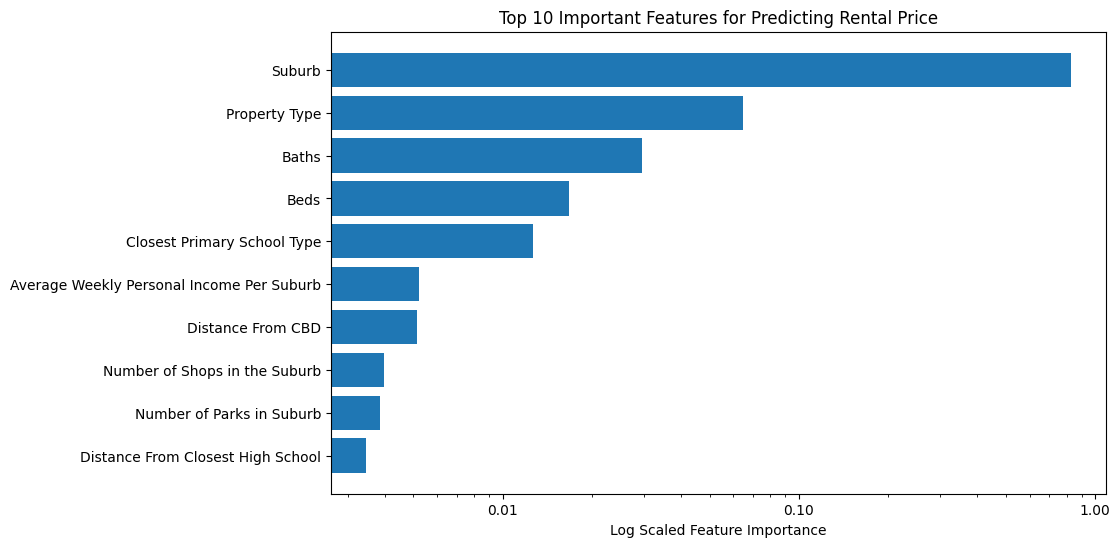

In [8]:
Image(filename=f'{plot_dir}Top_feats.png') 

Below are our plots for proximity features and visualisations for the saturation of the feautres
- Parks
- Hospitals
- Train Stations
- Shopping
- Schools



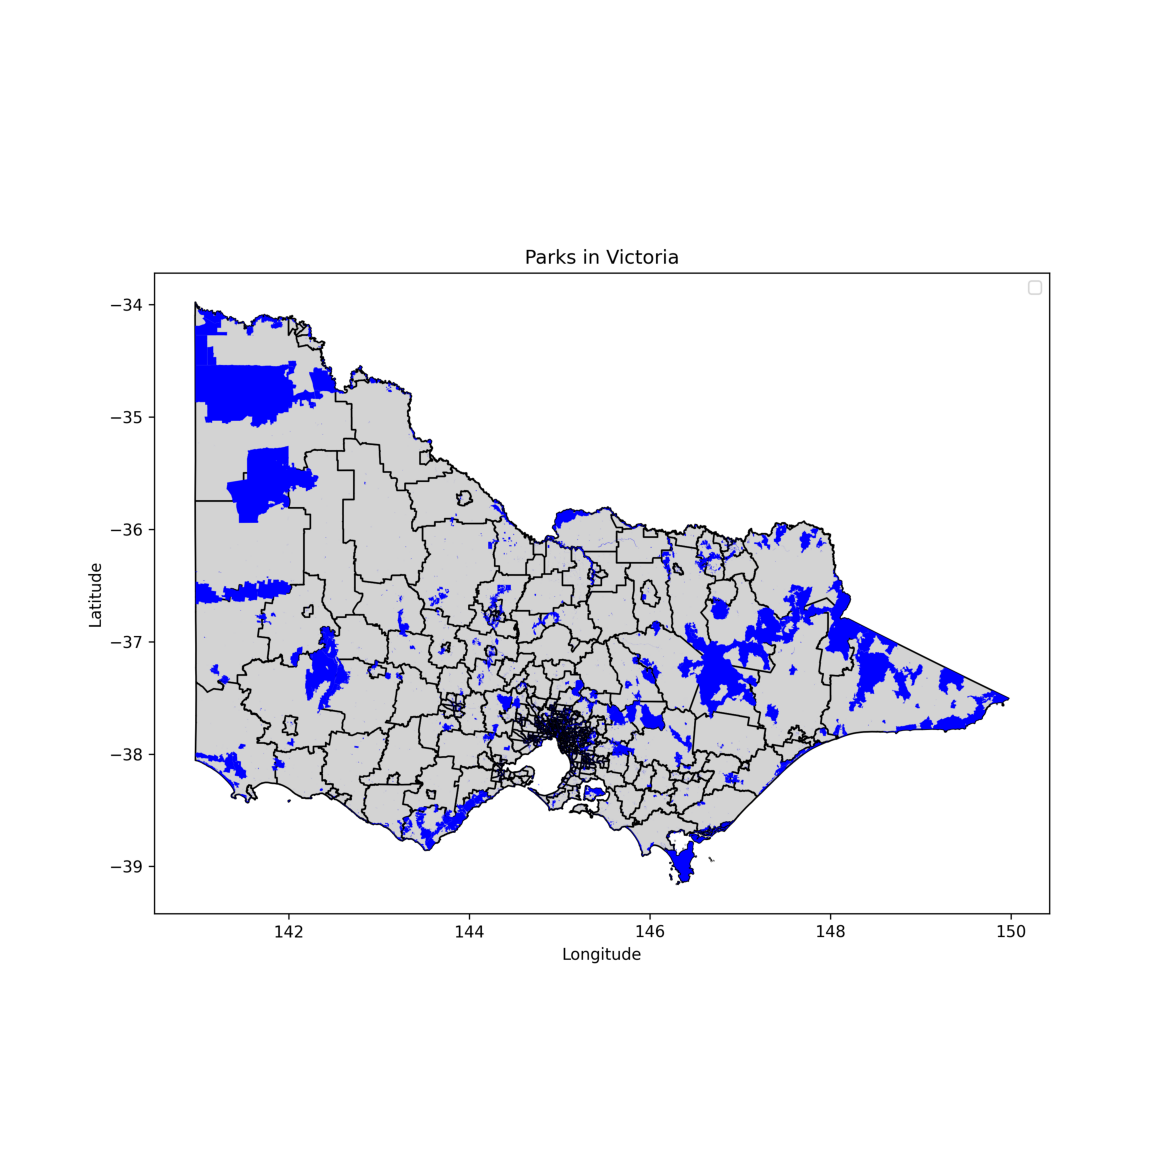

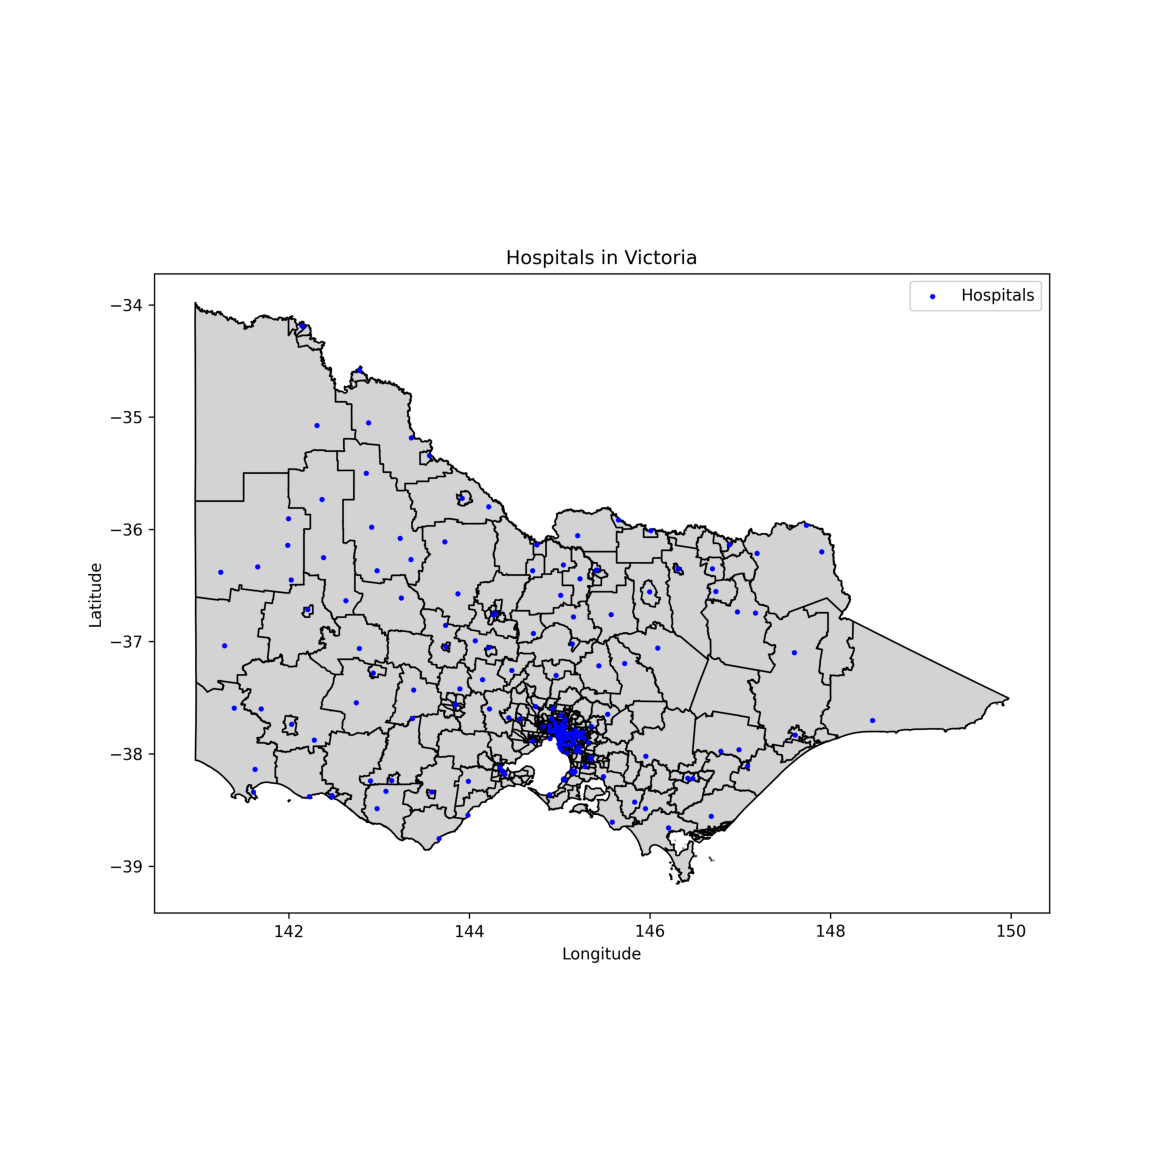

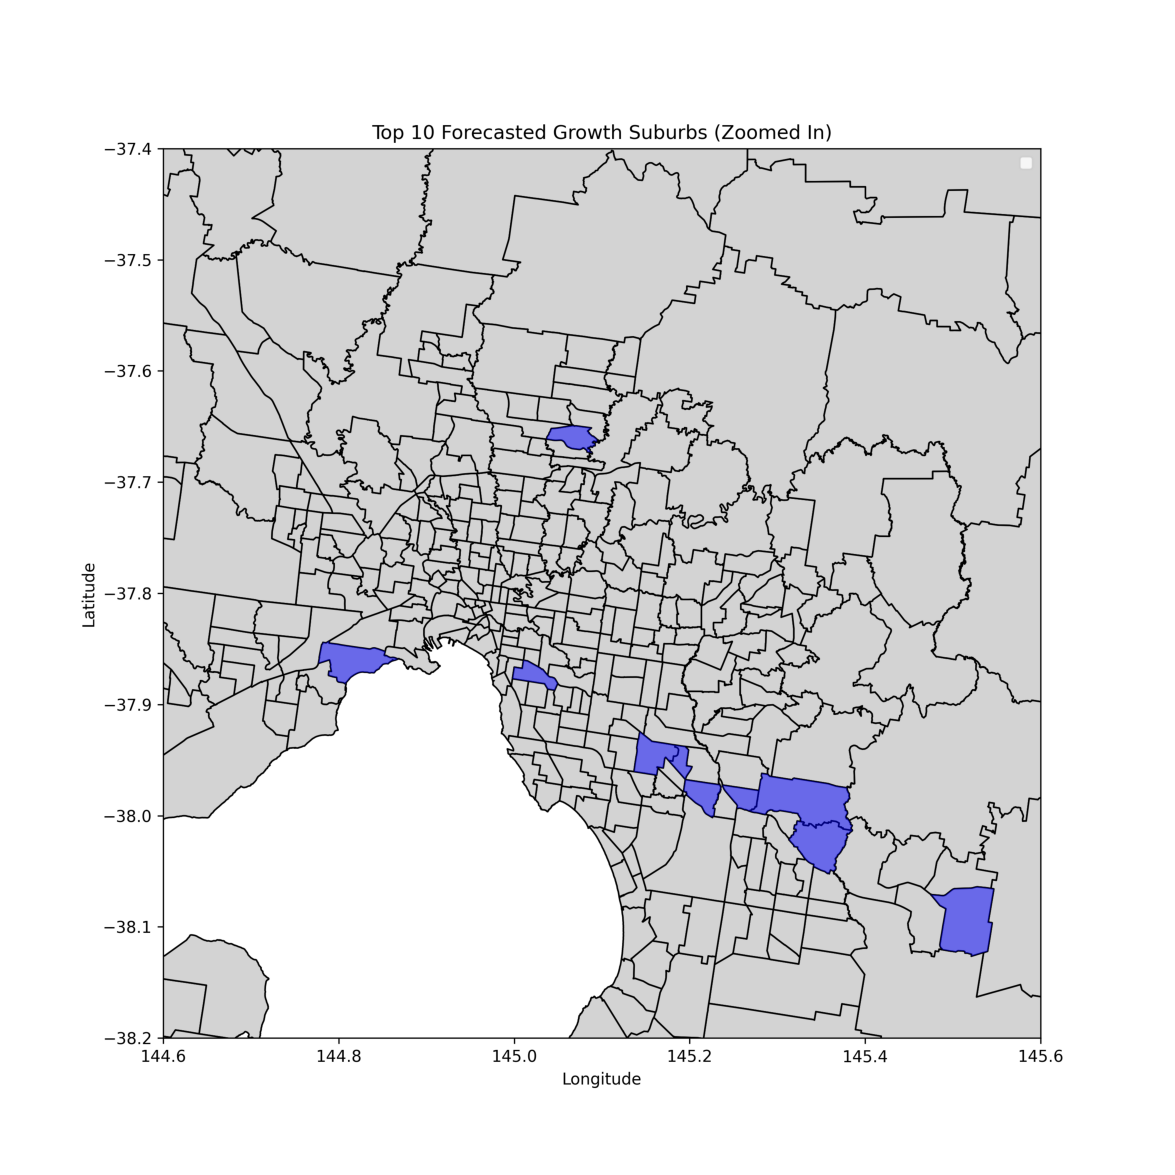

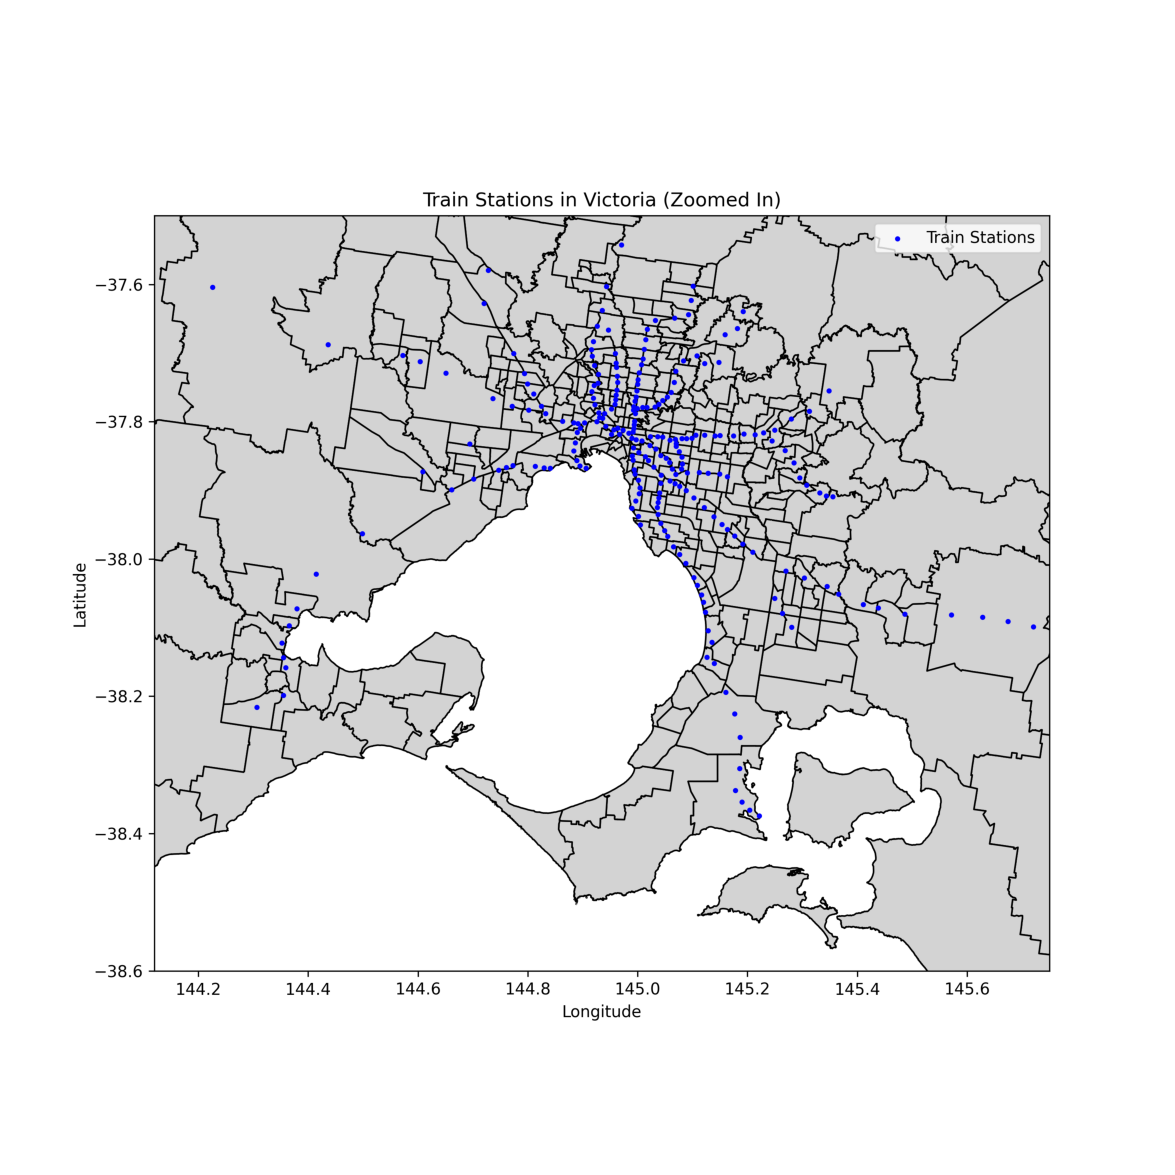

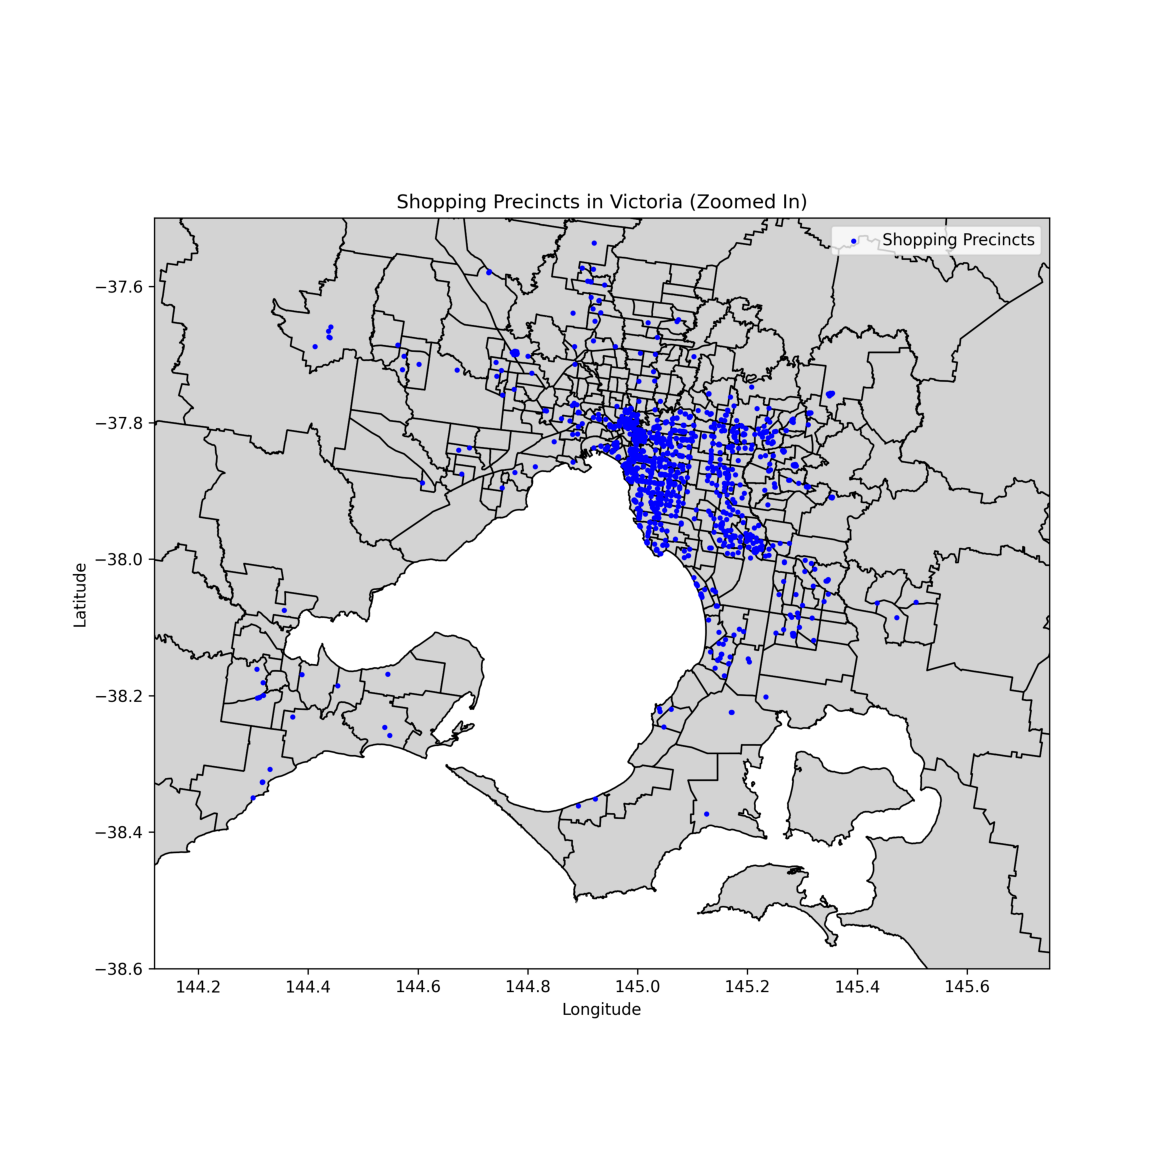

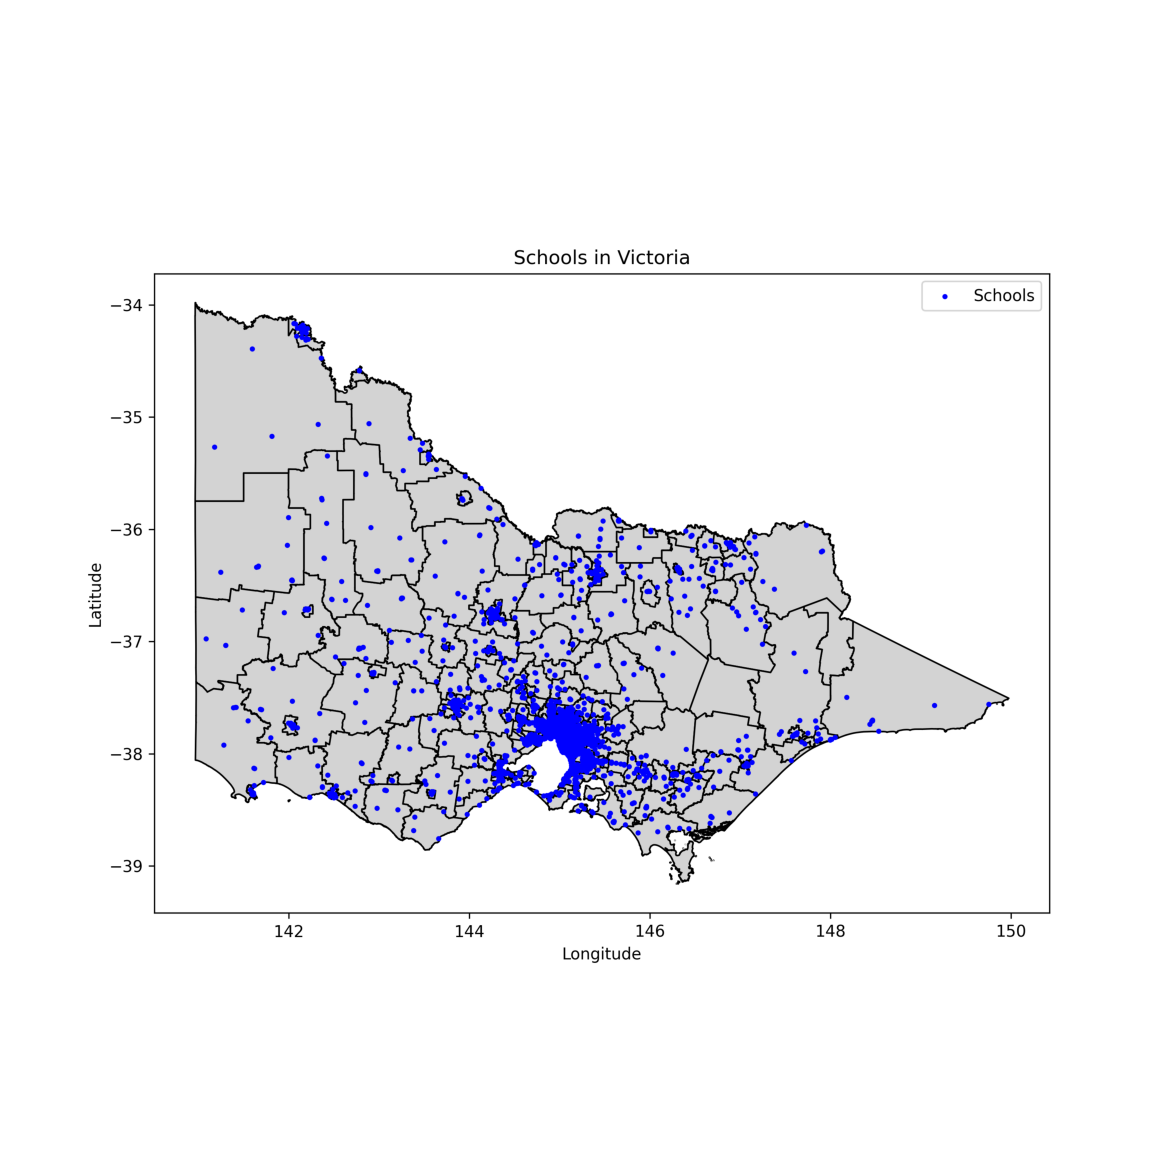

In [9]:
state_plot_dir = plot_dir + "state_plots"

for image_file in os.listdir(state_plot_dir):
    if image_file.endswith('.png'):  # Only display .png files
        # Load the image from file
        img = mpimg.imread(os.path.join(state_plot_dir, image_file))  
        
        # Display the image
        plt.figure(figsize=(15, 15)) 
        plt.imshow(img)
        plt.axis('off')  # Hide the axis
        plt.show()

Below are some graphs we have generated from our modelling.

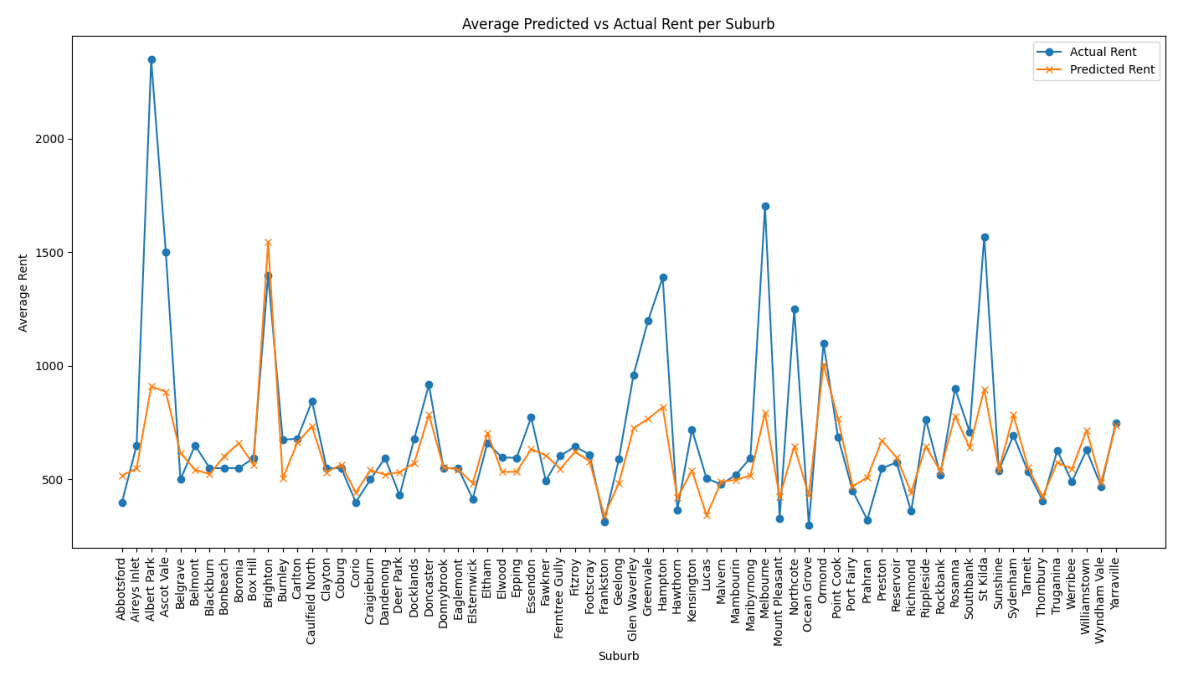

In [7]:
# Load the image from file
img = mpimg.imread(f'{plot_dir}Modelling_Predict.png')  

# Display the image
plt.figure(figsize=(15, 15)) 
plt.imshow(img)
plt.axis('off')  
plt.show()

A random sample of suburbs are displayed due to the number of suburbs that exist. You can see that in popular metropolitan areas, such as Albert Park, St. Kilda and Glen Waverley, the actual rent is higher than our predicted model. 

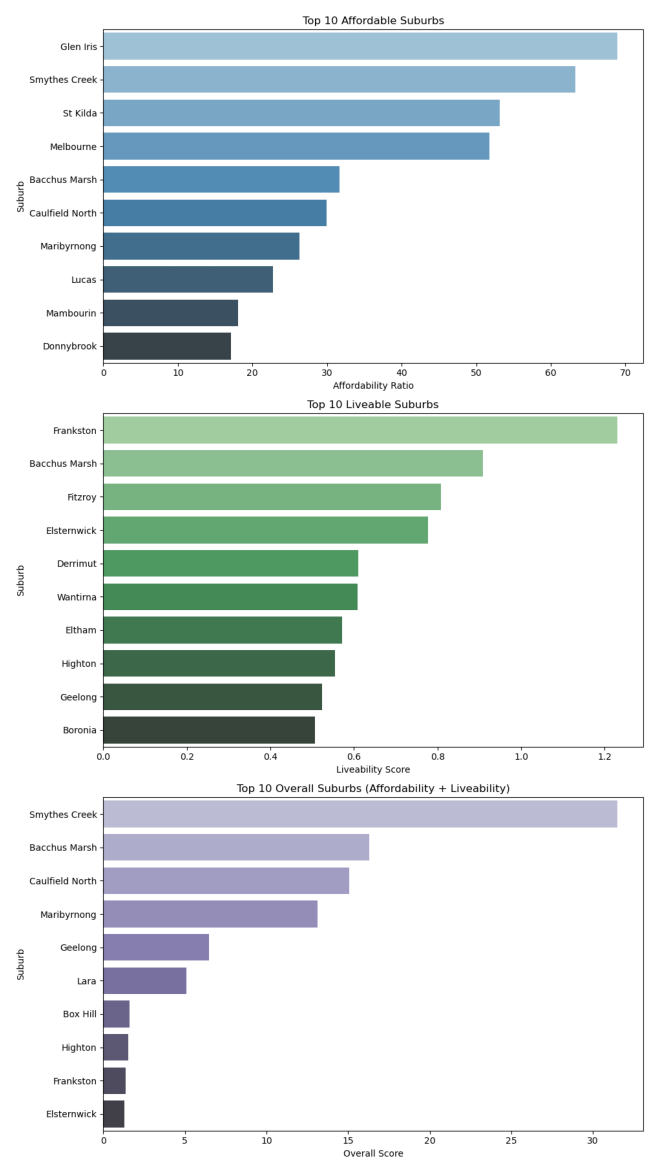

In [8]:
# Load the image from file
img = mpimg.imread(f'{plot_dir}Suburb_score.png')  

# Display the image
plt.figure(figsize=(15, 15)) 
plt.imshow(img)
plt.axis('off')  
plt.show()

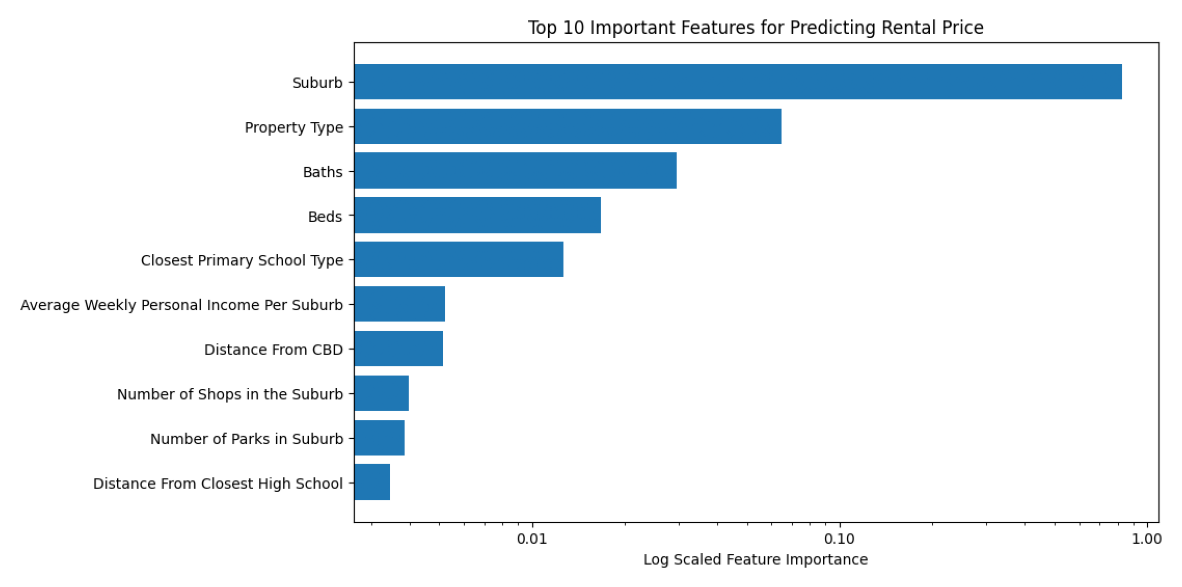

In [9]:
# Load the image from file
img = mpimg.imread(f'{plot_dir}Top_feats.png')  

# Display the image
plt.figure(figsize=(15, 15)) 
plt.imshow(img)
plt.axis('off')  
plt.show()

**Issues and Difficulties**
- We had to scrape through a third party website due to domain.com and realestate.com implemented anti-bot mechanisms 
  - Frequent timeouts during scraping.
- Downloading datasets, limited downloads available in links provided
  - May need to go back to original websites and register for a new link
- APIs and security
  - We would say hand it to client directly through a markdown text file via email, and ask them to input when needed
  - Some of the APIs had restrictive rate limits
    - Implemented retries or waiting periods to avoid exceeding quotas
- Data processing and cleaning
  - We collected data from different sites, hence different formats and 
  - Some may contain missing data
  - Longtitude and latitude data from scraping may not be precise
  
- Model Issues